In [1]:
# import random_VQE_data_prep as ran_VQE
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from sklearn.model_selection import KFold 
# import os
# import pickle
# import re

# import FeatureExtract as FE
import Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.preprocessing import LabelEncoder
# from qiskit_aer import Aer
# from qiskit_ibm_runtime.fake_provider import FakeQuitoV2

from folded_circuit import data_storage_Folded_circuit


Split the generated data into an validation and train/test set. `train_frac` can be chosen and decides how many percent of the data are used to train and test the model.

In [2]:
# def split_data(path="./scaled_pickles", train_frac = 0.8):
#     ### split data into evaluation and training set
#     assert train_frac < 1
#     assert train_frac >= 0

#     # shuffle data randomly to make different datasets
#     all_files = os.listdir(path)
#     # data_size = data.shape[0] # data.shape[0] changed to fit dictionary
#     # indices = np.arange(data_size)  
#     np.random.shuffle(all_files)
#     #data_shuffled = data[indices]

#     # split shuffeled data into test, train and eval according to fractions
#     idx_eval = int(train_frac * len(all_files))

#     files_train = all_files[:idx_eval]
#     files_eval = all_files[idx_eval:]

#     return files_train, files_eval

# files_train_scal, files_eval_scal = split_data()
# files_train, files_eval = split_data('./pickles')

`file_to_data(files)` takes a list of circuits and generates the data using `extract_features(path)`

In [3]:
# def file_to_data(files):
#     a = list()
#     for i, idx in enumerate(files):
#         a.append(FE.extract_features(f"./pickles/{idx}"))
#     df = pd.DataFrame(a)
#     return df

# def file_to_data_scaled(files):
#     a = list()
#     for i, idx in enumerate(files):
#         a.append(FE.extract_features_scaled(f"./scaled_pickles/{idx}"))
#     df = pd.DataFrame(a)
#     return df

# df_eval_original = file_to_data(files_eval)
# df_train_original = file_to_data(files_train)

# df_eval_scaled = file_to_data_scaled(files_eval_scal)
# df_train_scaled = file_to_data_scaled(files_train_scal)
# df_eval_scaled = df_eval_scaled.reindex(df_train_scaled.columns, axis=1)

# df_eval = pd.concat([df_eval_original, df_eval_scaled])
# df_train = pd.concat([df_train_original, df_train_scaled])
# df_eval = df_eval.reindex(df_train.columns, axis=1)

`split_data_kfold(df_train)` returns all the training and test data, as features (X) and the value to predict (y)

In [4]:
# def split_data_kfold(df_train):
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     X_train = []
#     X_test = []
#     y_train = []
#     y_test = []

#     X = df_train.drop(columns=['target'])
#     y = df_train['target']
    
#     for train_index, test_index in kf.split(df_train):
#         X_train.append(X.iloc[train_index])
#         X_test.append(X.iloc[test_index])
#         y_train.append(y.iloc[train_index])
#         y_test.append(y.iloc[test_index])
        
#     return X_train, X_test, y_train, y_test

# # Ensure the data is correct and check the type of first element
# X_train, X_test, y_train, y_test = split_data_kfold(df_train)

# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_data_kfold(df_train_scaled)

## Linear Regression

`Linear_Reg(data)` returns the best model of the k = 5 splits according to the R2

In [5]:
MSE_LR_kf, R2_LR_kf = Models.Linear_Reg_KF()
print(f'MSE kf: {MSE_LR_kf}; R2 kf: {R2_LR_kf}')

MSE_LR_eval, R2_LR_eval, _ = Models.Linear_Reg()
print(f'MSE eval: {MSE_LR_eval}; R2 eval: {R2_LR_eval}')

MSE kf: 0.062334740362130395; R2 kf: 0.6215108269169985
MSE eval: 0.07529775311546842; R2 eval: 0.5335918854143422


In [6]:
MSE_lri_eval, R2_lri_eval, _ = Models.Lin_Reg_Interaction()

135


## Random Forest

In [7]:
MSE_rf_hyperparam_eval, R2_rf_hyperparam_eval, _ = Models.Random_Forest_hyperparam()

print(f'Evaluation of best model - MSE: {MSE_rf_hyperparam_eval:.4f}, R2: {R2_rf_hyperparam_eval:.4f}')

Fitting 3 folds for each of 75 candidates, totalling 225 fits
{'n_estimators': 85, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'squared_error', 'bootstrap': True}
Evaluation of best model - MSE: 0.0675, R2: 0.5822


{'n_estimators': 85,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 19,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [8]:
MSE_rf_kf, R2_rf_kf = Models.Random_Forest_KF()
print(f'KFold RF - MSE: {MSE_rf_kf:.4f}, R2: {R2_rf_kf:.4f}')

MSE_rf_eval, R2_rf_eval, _ = Models.Random_Forest()
print(f'Evaluation - MSE: {MSE_rf_eval:.4f}, R2: {R2_rf_eval:.4f}')

KFold RF - MSE: 0.0586, R2: 0.6441
Evaluation - MSE: 0.0685, R2: 0.5757


In [9]:
MSE_rf_scaled_kf, R2_rf_scaled_kf = Models.Random_Forest_Scaled_KF()
print(f'KFold RF - MSE: {MSE_rf_scaled_kf:.4f}, R2: {R2_rf_scaled_kf:.4f}')

MSE_rf_scaled_eval, R2_rf_scaled_eval, _ = Models.Random_Forest_scaled()
print(f'Evaluation - MSE: {MSE_rf_scaled_eval:.4f}, R2: {R2_rf_scaled_eval:.4f}')

KFold RF - MSE: 0.0703, R2: 0.5756
Evaluation - MSE: 0.0643, R2: 0.6023


In [10]:
# import matplotlib.pyplot as plt

# features = X_train[0].columns
# importances = best_model_rf.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

#### plot of RFR only trained on `noisy_expectation`

c:\Users\malte\anaconda3\envs\Projectsem\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


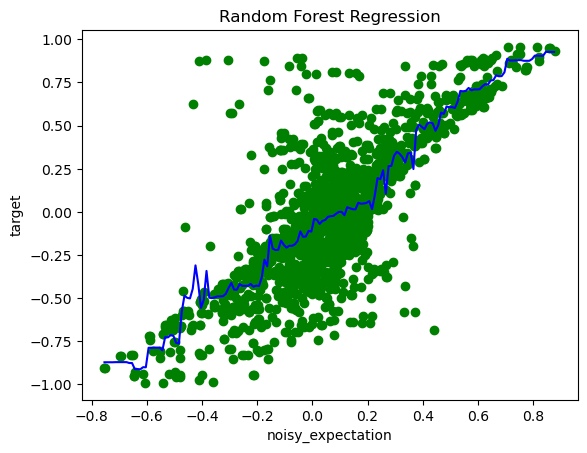

In [11]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5)
rf.fit(pd.DataFrame(Models.df_train['noisy_expectation']), Models.df_train['target'])

X_grid = np.arange(min(Models.df_train['noisy_expectation']), max(Models.df_train['noisy_expectation']), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Models.df_train['noisy_expectation'], Models.df_train['target'], color = 'green')
plt.plot(X_grid, rf.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('noisy_expectation')
plt.ylabel('target')
plt.show()

# Plot errors

Text(0.5, 1.0, 'Correlation Matrix')

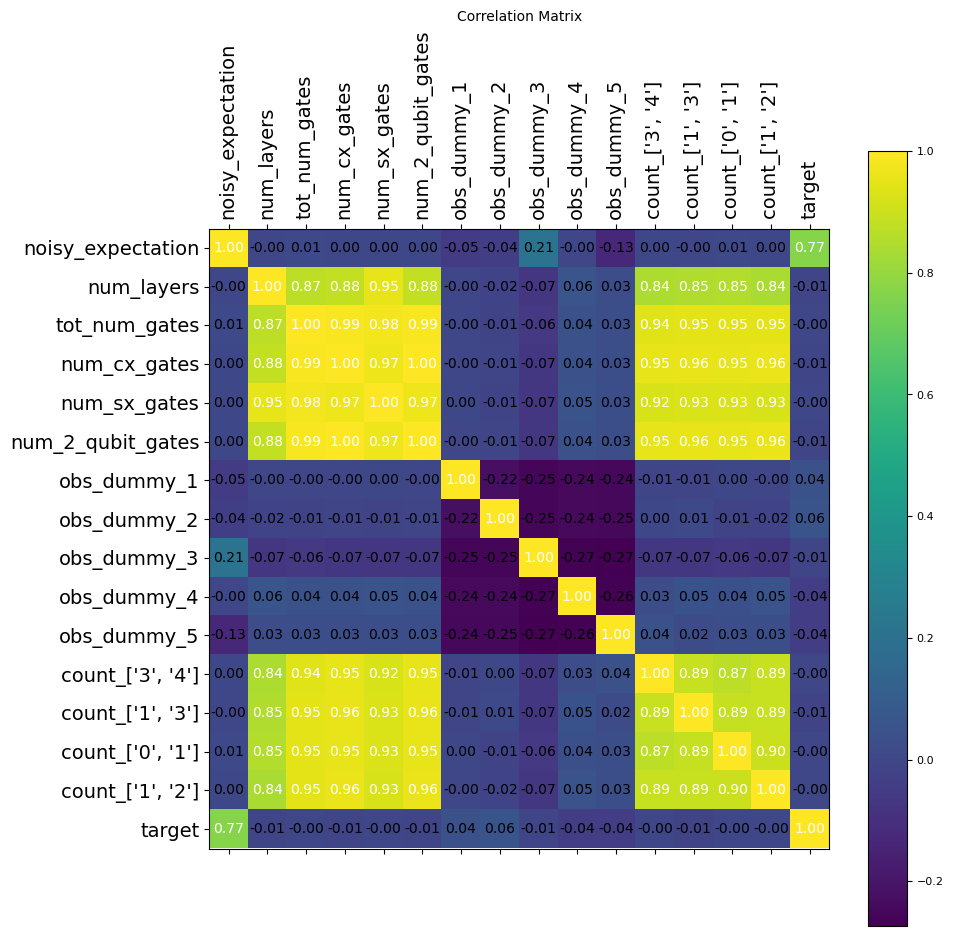

In [12]:
f = plt.figure(figsize=(10, 10))
plt.matshow(Models.df_train.corr(), fignum=f.number)
for (i, j), val in np.ndenumerate(Models.df_train.corr().values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')
plt.xticks(range(Models.df_train.select_dtypes(['number']).shape[1]), Models.df_train.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(Models.df_train.select_dtypes(['number']).shape[1]), Models.df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=10)

In [13]:
MSE_unmit = mean_squared_error(Models.df_eval['target'], Models.df_eval['noisy_expectation'])
R2_unmit = r2_score(Models.df_eval['target'], Models.df_eval['noisy_expectation'])
MSE_unmit

0.08552777240393329

In [14]:
Models.df_train.describe()

,noisy_expectation,num_layers,tot_num_gates,num_cx_gates,num_sx_gates,num_2_qubit_gates,obs_dummy_1,obs_dummy_2,obs_dummy_3,obs_dummy_4,obs_dummy_5,"count_['3', '4']","count_['1', '3']","count_['0', '1']","count_['1', '2']",target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.066358,3.036875,159.690625,29.150000,39.635625,29.150000,0.181875,0.183125,0.217500,0.205625,0.211875,7.231250,7.306250,7.295000,7.317500,-0.017404
std,0.251672,1.431099,72.953736,15.478121,16.609644,15.478121,0.385862,0.386890,0.412674,0.404284,0.408764,4.054849,4.038738,4.033379,4.039108,0.406835
min,-0.753660,1.000000,57.000000,8.000000,15.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,-0.990728
25%,-0.059645,2.000000,96.000000,16.000000,26.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,-0.292869
50%,0.057670,3.000000,157.500000,28.000000,37.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,6.000000,8.000000,-0.026307
75%,0.185030,4.000000,207.000000,40.000000,55.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,10.000000,0.231118
max,0.880840,5.000000,370.000000,80.000000,83.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,24.000000,22.000000,24.000000,0.956208


In [15]:
# fig, ax = plt.subplots()

# models = ['Unmitigated', 'Lin_Reg', 'RF', 'MSE_rf_scaled']
# MSE_error =[MSE_unmit, MSE_LR_kf, MSE_rf_kf, MSE_rf_scaled_kf]
# colors_kf = ['red', 'green', 'blue', 'purple']

# ax.bar(models, MSE_error, color = colors_kf)
# ax.set_xticklabels(models, rotation=90, ha='center')
# ax.set_ylabel('MSE')
# ax.set_title('MSE KFold values of models folded')

Text(0, 0.5, 'MSE')

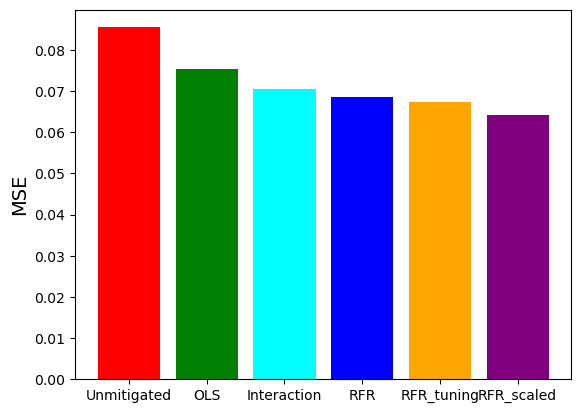

In [16]:
fig, ax = plt.subplots()

models = ['Unmitigated', 'OLS', 'Interaction', 'RFR', 'RFR_tuning', 'RFR_scaled']
MSE_error =[MSE_unmit, MSE_LR_eval, MSE_lri_eval, MSE_rf_eval, MSE_rf_hyperparam_eval, MSE_rf_scaled_eval]
colors = ['red', 'green', 'cyan', 'blue', 'orange', 'purple']

bar_width = 0.35

index = np.arange(len(models))

ax.bar(models, MSE_error, color = colors, label='MSE')

ax.set_ylabel('MSE', fontsize=14)
#ax.set_title('MSE Evaluation values of models folded', fontsize=16)

# ax2 = ax.twinx()
# R2_error =[R2_unmit, R2_LR_eval, R2_lri_eval, R2_rf_eval, R2_rf_hyperparam_eval, R2_rf_scaled_eval]

# bars2 = ax2.bar(index+bar_width+0.05, R2_error, bar_width, color = colors, edgecolor='gray', hatch='//', label='R2')
# ax.set_xticks(index + bar_width /2)
# ax.set_xticklabels(models, ha='center', fontsize=9)
# #ax2.set_xticklabels(models, ha='center', )
# ax2.set_ylabel('R2', fontsize=14)
# ax.legend(loc='upper left')
# ax2.legend(loc='upper right')


In [17]:
# fig, ax = plt.subplots()

# models = ['Unmitigated', 'Lin_Reg', 'RF', 'MSE_rf_scaled']
# R2_error =[MSE_unmit, MSE_LR_kf, MSE_rf_kf, MSE_rf_scaled_kf]

# ax.bar(models, R2_error, color = colors_kf)
# ax.set_xticklabels(models, rotation=90, ha='center')
# ax.set_ylabel('R2')
# ax.set_title('R2 KFold values of models folded')

In [18]:
# fig, ax = plt.subplots()

# models = ['Unmitigated', 'Lin_Reg', 'Lin_Reg_Interaction', 'RF', 'RF_hyperparameter', 'R2_rf_scaled']
# R2_error =[R2_unmit, R2_LR_eval, R2_lri_eval, R2_rf_eval, R2_rf_hyperparam_eval, R2_rf_scaled_eval]

# ax.bar(models, R2_error, color = colors)
# ax.set_xticklabels(models, rotation=90, ha='center')
# ax.set_ylabel('R2')
# ax.set_title('R2 Evaluation values of models folded')